In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 1024.", name="epoch 100")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(1024, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=100, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1024)              1051648   
                                                                 
 dense (Dense)               (None, 25)                25625     
                                                                 
Total params: 1,077,273
Trainable params: 1,077,273
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
4/5 [=======================>......] - ETA: 0s - loss: 0.8657 - mae: 0.7647INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 652ms/step - loss: 1.1360 - mae: 0.8628 - val_loss: 5.9229 - val_mae: 2.3162
Epoch 2/100
4/5 [=======================>......] - ETA: 0s - loss: 5.0288 - mae: 1.9621INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 537ms/step - loss: 4.7110 - mae: 1.8773 - val_loss: 1.3797 - val_mae: 0.9749
Epoch 3/100
5/5 [==============================] - 1s 172ms/step - loss: 1.6022 - mae: 1.1044 - val_loss: 2.8650 - val_mae: 1.6126
Epoch 4/100
5/5 [==============================] - 1s 147ms/step - loss: 1.8708 - mae: 1.1582 - val_loss: 1.6099 - val_mae: 1.1814
Epoch 5/100
5/5 [==============================] - ETA: 0s - loss: 1.5560 - mae: 1.0736INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 522ms/step - loss: 1.5560 - mae: 1.0736 - val_loss: 0.2777 - val_mae: 0.4309
Epoch 6/100
5/5 [==============================] - 1s 168ms/step - loss: 0.9047 - mae: 0.7359 - val_loss: 3.6871 - val_mae: 1.8399
Epoch 7/100
5/5 [==============================] - 1s 150ms/step - loss: 3.0366 - mae: 1.5321 - val_loss: 0.3723 - val_mae: 0.4983
Epoch 8/100
5/5 [==============================] - 1s 148ms/step - loss: 1.4788 - mae: 0.9312 - val_loss: 7.3525 - val_mae: 2.6469
Epoch 9/100
5/5 [==============================] - 1s 150ms/step - loss: 3.3679 - mae: 1.5947 - val_loss: 3.0050 - val_mae: 1.6339
Epoch 10/100
5/5 [==============================] - 1s 150ms/step - loss: 1.9643 - mae: 1.1788 - val_loss: 1.5453 - val_mae: 1.0862
Epoch 11/100
5/5 [==============================] - 1s 157ms/step - loss: 1.3424 - mae: 0.8432 - val_loss: 6.5711 - val_mae: 2.5257
Epoch 12/100
5/5 [==============================] - 1s 158ms/step - loss: 3.9197 - mae: 1.763

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 512ms/step - loss: 0.5772 - mae: 0.6216 - val_loss: 0.2111 - val_mae: 0.3787
Epoch 16/100
5/5 [==============================] - 1s 166ms/step - loss: 0.4232 - mae: 0.5244 - val_loss: 0.4126 - val_mae: 0.5348
Epoch 17/100
5/5 [==============================] - ETA: 0s - loss: 0.2405 - mae: 0.3940INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 504ms/step - loss: 0.2405 - mae: 0.3940 - val_loss: 0.1875 - val_mae: 0.3605
Epoch 18/100
5/5 [==============================] - ETA: 0s - loss: 0.2020 - mae: 0.3614INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 526ms/step - loss: 0.2020 - mae: 0.3614 - val_loss: 0.1871 - val_mae: 0.3548
Epoch 19/100
5/5 [==============================] - 1s 187ms/step - loss: 0.1829 - mae: 0.3450 - val_loss: 0.3894 - val_mae: 0.5081
Epoch 20/100
5/5 [==============================] - 1s 158ms/step - loss: 0.4153 - mae: 0.5161 - val_loss: 0.2336 - val_mae: 0.3906
Epoch 21/100
5/5 [==============================] - 1s 155ms/step - loss: 0.4924 - mae: 0.5525 - val_loss: 0.2765 - val_mae: 0.4335
Epoch 22/100
5/5 [==============================] - 1s 157ms/step - loss: 0.4287 - mae: 0.5275 - val_loss: 0.3044 - val_mae: 0.4461
Epoch 23/100
5/5 [==============================] - 1s 151ms/step - loss: 0.3012 - mae: 0.4411 - val_loss: 0.3191 - val_mae: 0.4557
Epoch 24/100
5/5 [==============================] - 1s 147ms/step - loss: 0.2984 - mae: 0.4424 - val_loss: 0.2012 - val_mae: 0.3674
Epoch 25/100
5/5 [==============================] - ETA: 0s - loss: 0.1985 - mae: 0.3669I

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 520ms/step - loss: 0.1985 - mae: 0.3669 - val_loss: 0.1809 - val_mae: 0.3511
Epoch 26/100
5/5 [==============================] - ETA: 0s - loss: 0.1647 - mae: 0.3319INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 525ms/step - loss: 0.1647 - mae: 0.3319 - val_loss: 0.1548 - val_mae: 0.3268
Epoch 27/100
5/5 [==============================] - 1s 183ms/step - loss: 0.1569 - mae: 0.3234 - val_loss: 0.1866 - val_mae: 0.3553
Epoch 28/100
5/5 [==============================] - 1s 152ms/step - loss: 0.1878 - mae: 0.3578 - val_loss: 0.2341 - val_mae: 0.3996
Epoch 29/100
4/5 [=======================>......] - ETA: 0s - loss: 0.1914 - mae: 0.3594INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 528ms/step - loss: 0.1858 - mae: 0.3533 - val_loss: 0.1541 - val_mae: 0.3195
Epoch 30/100
5/5 [==============================] - ETA: 0s - loss: 0.1478 - mae: 0.3143INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 523ms/step - loss: 0.1478 - mae: 0.3143 - val_loss: 0.1318 - val_mae: 0.2996
Epoch 31/100
5/5 [==============================] - ETA: 0s - loss: 0.1477 - mae: 0.3140INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 541ms/step - loss: 0.1477 - mae: 0.3140 - val_loss: 0.1159 - val_mae: 0.2806
Epoch 32/100
5/5 [==============================] - 1s 159ms/step - loss: 0.1461 - mae: 0.3121 - val_loss: 0.1198 - val_mae: 0.2757
Epoch 33/100
5/5 [==============================] - 1s 155ms/step - loss: 0.1489 - mae: 0.3180 - val_loss: 0.1236 - val_mae: 0.2813
Epoch 34/100
5/5 [==============================] - 1s 154ms/step - loss: 0.1213 - mae: 0.2827 - val_loss: 0.1924 - val_mae: 0.3659
Epoch 35/100
5/5 [==============================] - 1s 151ms/step - loss: 0.1825 - mae: 0.3534 - val_loss: 0.1615 - val_mae: 0.3263
Epoch 36/100
5/5 [==============================] - 1s 152ms/step - loss: 0.1528 - mae: 0.3179 - val_loss: 0.1908 - val_mae: 0.3585
Epoch 37/100
5/5 [==============================] - 1s 151ms/step - loss: 0.1718 - mae: 0.3440 - val_loss: 0.1270 - val_mae: 0.2928
Epoch 38/100
5/5 [==============================] - 1s 151ms/step - loss: 0.1285 - mae: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 528ms/step - loss: 0.1310 - mae: 0.2946 - val_loss: 0.1090 - val_mae: 0.2700
Epoch 40/100
5/5 [==============================] - ETA: 0s - loss: 0.1188 - mae: 0.2834INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 528ms/step - loss: 0.1188 - mae: 0.2834 - val_loss: 0.0921 - val_mae: 0.2447
Epoch 41/100
5/5 [==============================] - ETA: 0s - loss: 0.0900 - mae: 0.2436INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 570ms/step - loss: 0.0900 - mae: 0.2436 - val_loss: 0.0803 - val_mae: 0.2257
Epoch 42/100
5/5 [==============================] - ETA: 0s - loss: 0.0830 - mae: 0.2315INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 540ms/step - loss: 0.0830 - mae: 0.2315 - val_loss: 0.0777 - val_mae: 0.2209
Epoch 43/100
5/5 [==============================] - ETA: 0s - loss: 0.0777 - mae: 0.2220INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 544ms/step - loss: 0.0777 - mae: 0.2220 - val_loss: 0.0737 - val_mae: 0.2109
Epoch 44/100
5/5 [==============================] - ETA: 0s - loss: 0.0868 - mae: 0.2328INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 536ms/step - loss: 0.0868 - mae: 0.2328 - val_loss: 0.0734 - val_mae: 0.2094
Epoch 45/100
5/5 [==============================] - 1s 155ms/step - loss: 0.0846 - mae: 0.2313 - val_loss: 0.0784 - val_mae: 0.2179
Epoch 46/100
5/5 [==============================] - 1s 152ms/step - loss: 0.0768 - mae: 0.2193 - val_loss: 0.0885 - val_mae: 0.2342
Epoch 47/100
5/5 [==============================] - 1s 151ms/step - loss: 0.0826 - mae: 0.2292 - val_loss: 0.1281 - val_mae: 0.2952
Epoch 48/100
5/5 [==============================] - 1s 150ms/step - loss: 0.0946 - mae: 0.2467 - val_loss: 0.0785 - val_mae: 0.2227
Epoch 49/100
5/5 [==============================] - ETA: 0s - loss: 0.0831 - mae: 0.2277INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 517ms/step - loss: 0.0831 - mae: 0.2277 - val_loss: 0.0731 - val_mae: 0.2121
Epoch 50/100
5/5 [==============================] - 1s 174ms/step - loss: 0.0885 - mae: 0.2389 - val_loss: 0.1153 - val_mae: 0.2777
Epoch 51/100
5/5 [==============================] - 1s 154ms/step - loss: 0.1042 - mae: 0.2588 - val_loss: 0.0896 - val_mae: 0.2376
Epoch 52/100
5/5 [==============================] - 1s 152ms/step - loss: 0.1010 - mae: 0.2560 - val_loss: 0.1039 - val_mae: 0.2622
Epoch 53/100
5/5 [==============================] - 1s 157ms/step - loss: 0.0840 - mae: 0.2350 - val_loss: 0.0779 - val_mae: 0.2239
Epoch 54/100
5/5 [==============================] - 1s 155ms/step - loss: 0.0819 - mae: 0.2298 - val_loss: 0.0743 - val_mae: 0.2148
Epoch 55/100
5/5 [==============================] - 1s 147ms/step - loss: 0.0780 - mae: 0.2217 - val_loss: 0.0855 - val_mae: 0.2307
Epoch 56/100
5/5 [==============================] - 1s 147ms/step - loss: 0.0880 - mae: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 498ms/step - loss: 0.0827 - mae: 0.2290 - val_loss: 0.0728 - val_mae: 0.2111
Epoch 60/100
5/5 [==============================] - 1s 177ms/step - loss: 0.0892 - mae: 0.2381 - val_loss: 0.0881 - val_mae: 0.2368
Epoch 61/100
5/5 [==============================] - 1s 150ms/step - loss: 0.0791 - mae: 0.2229 - val_loss: 0.0734 - val_mae: 0.2105
Epoch 62/100
5/5 [==============================] - 1s 153ms/step - loss: 0.0748 - mae: 0.2167 - val_loss: 0.0751 - val_mae: 0.2130
Epoch 63/100
5/5 [==============================] - 1s 150ms/step - loss: 0.0771 - mae: 0.2209 - val_loss: 0.0769 - val_mae: 0.2154
Epoch 64/100
5/5 [==============================] - 1s 151ms/step - loss: 0.0931 - mae: 0.2459 - val_loss: 0.1383 - val_mae: 0.3104
Epoch 65/100
5/5 [==============================] - 1s 151ms/step - loss: 0.1099 - mae: 0.2667 - val_loss: 0.1122 - val_mae: 0.2722
Epoch 66/100
5/5 [==============================] - 1s 149ms/step - loss: 0.1077 - mae: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 501ms/step - loss: 0.0809 - mae: 0.2246 - val_loss: 0.0716 - val_mae: 0.2078
Epoch 82/100
5/5 [==============================] - 1s 186ms/step - loss: 0.0717 - mae: 0.2099 - val_loss: 0.0741 - val_mae: 0.2124
Epoch 83/100
5/5 [==============================] - 1s 158ms/step - loss: 0.0883 - mae: 0.2371 - val_loss: 0.1742 - val_mae: 0.3478
Epoch 84/100
5/5 [==============================] - 1s 150ms/step - loss: 0.1262 - mae: 0.2851 - val_loss: 0.1016 - val_mae: 0.2565
Epoch 85/100
5/5 [==============================] - 1s 149ms/step - loss: 0.1141 - mae: 0.2766 - val_loss: 0.0896 - val_mae: 0.2432
Epoch 86/100
5/5 [==============================] - 1s 151ms/step - loss: 0.1057 - mae: 0.2663 - val_loss: 0.0903 - val_mae: 0.2444
Epoch 87/100
5/5 [==============================] - 1s 151ms/step - loss: 0.0918 - mae: 0.2458 - val_loss: 0.0816 - val_mae: 0.2317
Epoch 88/100
5/5 [==============================] - 1s 151ms/step - loss: 0.0835 - mae: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202811-2o8y3n5r\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 524ms/step - loss: 0.0786 - mae: 0.2207 - val_loss: 0.0715 - val_mae: 0.2055
Epoch 100/100
5/5 [==============================] - 1s 199ms/step - loss: 0.0762 - mae: 0.2167 - val_loss: 0.1043 - val_mae: 0.2605


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 96ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.477371 , 1.5985202, 1.2865431, 1.6060822, 1.5490266, 1.3621948,
        1.3209684, 1.6158724, 1.7872568, 1.9201516, 1.3815604, 1.3517988,
        1.3557148, 1.2300427, 1.4558803, 1.7703522, 1.4786557, 1.8651628,
        1.6602042, 1.9084238, 1.5671488, 1.964677 , 1.3264045, 1.6011597,
        1.7797229]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

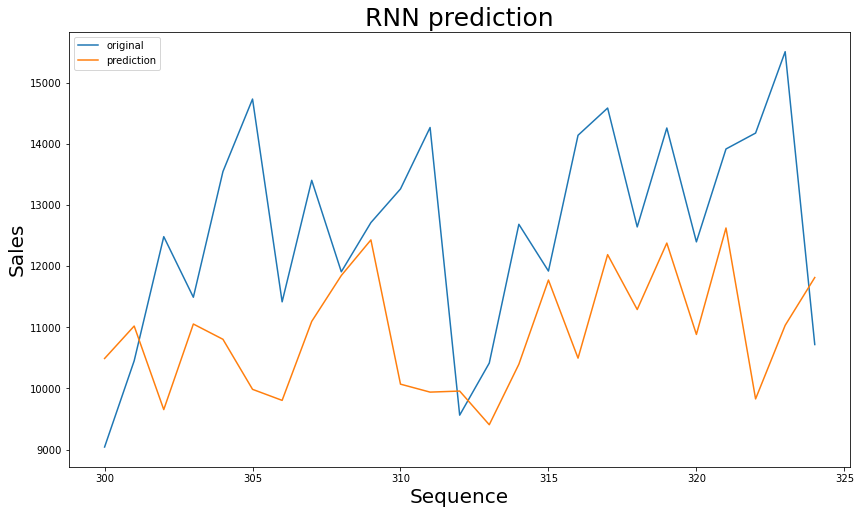

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 28ms/step - loss: 0.3181 - mae: 0.4603


[0.318068265914917, 0.4602605104446411]